# View the satellite imagery available

The goal of this notebook is to view the satellite imagery for the period of interest for the Passor Commune, Burkina Farso area.

From the background given, the Passore Commune Area was bare land before 1998. 
The goverment asked the community to plant trees in the area in 1998. 

## Getting Started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages

In [11]:
import datacube
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from datacube.utils import geometry

from deafrica_tools.datahandling import load_ard, mostcommon_crs
from deafrica_tools.plotting import map_shapefile, rgb, plot_lulc
from deafrica_tools.spatial import xr_rasterize
from deafrica_tools.bandindices import calculate_indices

### Connect to the datacube

In [12]:
dc = datacube.Datacube(app='Forestmonitoring_visualization')

In [13]:
# Read the area of interest GeoJSON file into a GeoDataFrame.
geojson_path = 'data/Passore.geojson'
gdf = gpd.read_file(geojson_path)

# Convert all of the shapes into a datacube geometry using geometry.Geometry.
geom = geometry.Geometry(gdf.unary_union, gdf.crs)

# Display the GeoJSON on a basemap.
map_shapefile(gdf, attribute=gdf.columns[0], fillOpacity=0, weight=2)

Label(value='')

Map(center=[12.88048505783081, -2.1206949353218074], controls=(ZoomControl(options=['position', 'zoom_in_text'…

## View Landsat Annual GeoMAD composites for the years 1996 - 2021 for the Passore Commune. 

There are two Landsat Annual GeoMAD composites:
- `gm_ls8_annual`: Annual (calendar year) GeoMAD composite using Landsat-8 imagery, available for the years 2013 - present
- `gm_ls5_ls7_annual`: Annual (calendar year) GeoMAD composite combining both Landsat-5 and Landsat-7 imagery, available for the years 1984 - 2012

In [14]:
# load the Landsat data
ds_ls = dc.load(product=["gm_ls5_ls7_annual", "gm_ls8_annual"],
                measurements=['red', 'green', 'blue', 'nir'],
                geopolygon=geom,
                resolution=(-30,30),
                output_crs="EPSG:6933",
                time = ("1996", "2021"))

# Calculate the NDVI.
ds_ls = calculate_indices(ds_ls, index='NDVI', collection='c2')

# Rasterize the GeoJSON 
mask = xr_rasterize(gdf, ds_ls)
# Mask the Landsta Annual GeoMADs dataset.
ds_ls = ds_ls.where(mask)

print(ds_ls)

<xarray.Dataset>
Dimensions:      (time: 25, y: 2208, x: 3809)
Coordinates:
  * time         (time) datetime64[ns] 1996-07-01T23:59:59.999999 ... 2020-07...
  * y            (y) float64 1.663e+06 1.663e+06 ... 1.597e+06 1.597e+06
  * x            (x) float64 -2.617e+05 -2.617e+05 ... -1.475e+05 -1.475e+05
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    green        (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    blue         (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    nir          (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    NDVI         (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref


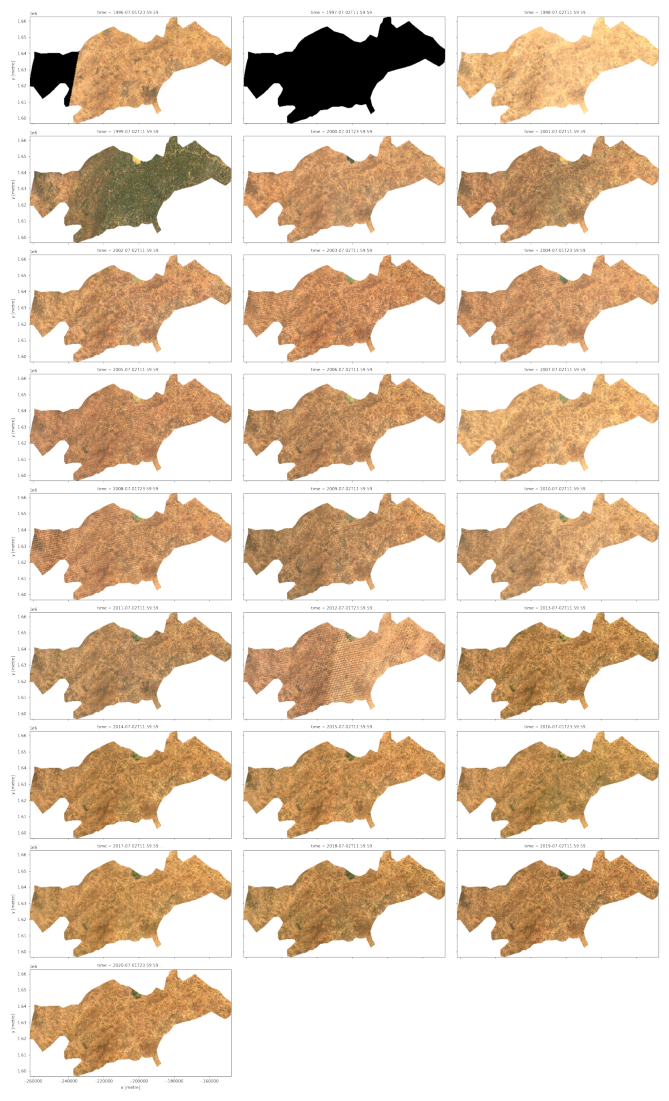

In [5]:
# PLot the RGB images.
# rgb(ds_ls, col='time', col_wrap = 3, size=4, savefig_path='data/annual_LS578.png')
# Presaved image because smaller sandbox crashes when plotting the RGB images.
img = mpimg.imread('data/annual_LS578.png')
fig, ax = plt.subplots(figsize=(30,20))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [10]:
# Plot the NDVI images.
#ds_ls.NDVI.plot.imshow(col='time', figsize=(20,36) ,robust=True, col_wrap=3, cmap="RdYlGn", vmin=-1, vmax=1)
#plt.savefig(fname='data/annual_LS578_NDVI.png')
img = mpimg.imread('data/annual_LS578_NDVI.png')
fig, ax = plt.subplots(figsize=(30,20))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

NameError: name 'ds_ls' is not defined

**Landsat Annual GeoMAD RGB observations:**
- In 1996 and 1998 the area seems dry and devoid of vegetation. 
- In 1999 the area seems quite green. This is expected as it indicates the start of the planting of trees in the Passore Commune Area as ordered by the government in 1998.
- From the year after, 2000, the area seems dry with periodic sproutings of greeness, but no real indication of forest. (I'm assuming indication of a forest area is a continouus persistence of greeness. 

**Landsat Annual GeoMAD NDVI observations:**
There does not seem to be much going on in the way of greenness in the area using NDVI.

## View the bi-annual Sentinel 2 GeoMAd composites available for the years 2019 - present for the Passore Commune. 

In [ ]:
# load the Sentinel 2 data
ds_s2 = dc.load(product="gm_s2_semiannual",
                measurements=['red', 'green', 'blue', 'nir'],
                geopolygon=geom,
                resolution=(-10,10),
                output_crs="EPSG:6933",
                time=("2019", "2021"))

# Calculate the NDVI.
ds_s2 = calculate_indices(ds_s2, index='NDVI', collection='s2')

# Rasterize the GeoJSON 
mask = xr_rasterize(gdf, ds_s2)
# Mask the Sentinel 2 Annual GeoMADs dataset.
ds_s2 = ds_s2.where(mask)

print(ds_s2)

In [ ]:
# Plot the RGB images.
# rgb(ds_s2, col='time', col_wrap =2, size=4, savefig_path='data/semiannual_S2.png')
# Presaved image because smaller sandbox crashes when plotting the RGB images.
img = mpimg.imread('data/semiannual_S2.png')
fig, ax = plt.subplots(figsize=(20,20))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# Plot the NDVI images.
#ds_s2.NDVI.plot.imshow(col='time', figsize=(20,20) ,robust=True, col_wrap=2, cmap="RdYlGn", vmin=0, vmax=1)
#plt.savefig(fname='data/semiannual_S2_NDVI.png')
# Presaved image because smaller sandbox crashes when plotting the RGB images.
img = mpimg.imread('data/semiannual_S2_NDVI.png')
fig, ax = plt.subplots(figsize=(20,20))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

**Sentinel 1 bi-annual GeoMAD composites RGB observations**
- For the years 2019 and 2020 the latter half of the years experience an increase in green areas.
- I cannot conclude these areas are forest because I am assuming that forest area is shown by persistent greeness throughout the year.

## View the Forest cover from LULC products for the years available

In [4]:
# Load  the ESRI Landcover Classification dataset.
ds_esri = dc.load(product='io_lulc',
                  measurements='classification',
                  geopolygon=geom,
                  resolution=(-10,10),
                  output_crs="EPSG:6933",
                  time=("2020")).squeeze()

# Rasterize the GeoJSON 
mask = xr_rasterize(gdf, ds_esri)
# Mask the ESRI Landcover Classification dataset.
ds_esri = ds_esri.where(mask)

print(ds_esri)

<xarray.Dataset>
Dimensions:         (y: 6623, x: 11426)
Coordinates:
    time            datetime64[ns] 2020-07-02
  * y               (y) float64 1.663e+06 1.663e+06 ... 1.597e+06 1.597e+06
  * x               (x) float64 -2.617e+05 -2.617e+05 ... -1.475e+05 -1.475e+05
    spatial_ref     int32 6933
Data variables:
    classification  (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref


In [5]:
# Load the ESA World Cover classification dataset.
ds_esa = dc.load(product='esa_worldcover',
                  measurements='classification',
                  geopolygon=geom,
                  resolution=(-10,10),
                  output_crs="EPSG:6933",
                  time=("2020")).squeeze()

# Rasterize the GeoJSON 
mask = xr_rasterize(gdf, ds_esa)
# Mask the ESRI Landcover Classification dataset.
ds_esa = ds_esa.where(mask)

print(ds_esa)

<xarray.Dataset>
Dimensions:         (y: 6623, x: 11426)
Coordinates:
    time            datetime64[ns] 2020-07-01T12:00:00
  * y               (y) float64 1.663e+06 1.663e+06 ... 1.597e+06 1.597e+06
  * x               (x) float64 -2.617e+05 -2.617e+05 ... -1.475e+05 -1.475e+05
    spatial_ref     int32 6933
Data variables:
    classification  (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref


In [6]:
# Load the Copernicus Global Land Service, Land Use/Land Cover at 100 m dataset.
ds_cgls = dc.load(product='cgls_landcover',
                  measurements='classification',
                  geopolygon=geom,
                  resolution=(-100,100),
                  output_crs="EPSG:6933",
                  time=("2015", "2019")).squeeze()

# Rasterize the GeoJSON 
mask = xr_rasterize(gdf, ds_cgls)
# Mask the ESRI Landcover Classification dataset.
ds_cgls = ds_cgls.where(mask)

print(ds_cgls)

<xarray.Dataset>
Dimensions:         (time: 5, y: 663, x: 1143)
Coordinates:
  * time            (time) datetime64[ns] 2015-07-02T11:59:59.500000 ... 2019...
  * y               (y) float64 1.663e+06 1.663e+06 ... 1.597e+06 1.597e+06
  * x               (x) float64 -2.618e+05 -2.616e+05 ... -1.476e+05 -1.476e+05
    spatial_ref     int32 6933
Data variables:
    classification  (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref


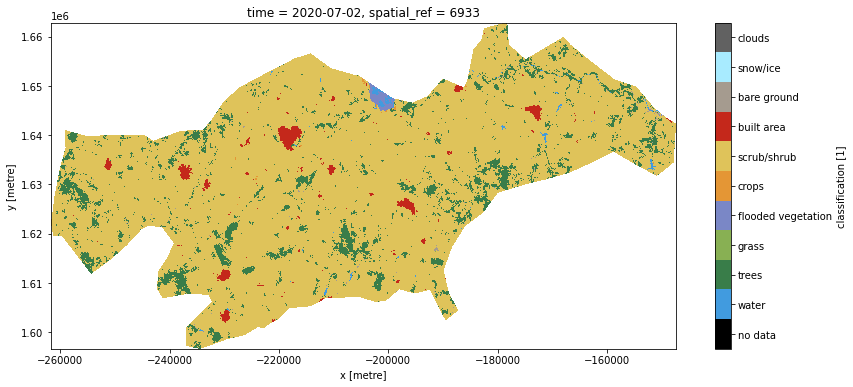

In [7]:
fig,ax = plt.subplots(figsize=(14,6))
plot_lulc(ds_esri['classification'], product='ESRI', legend=True)

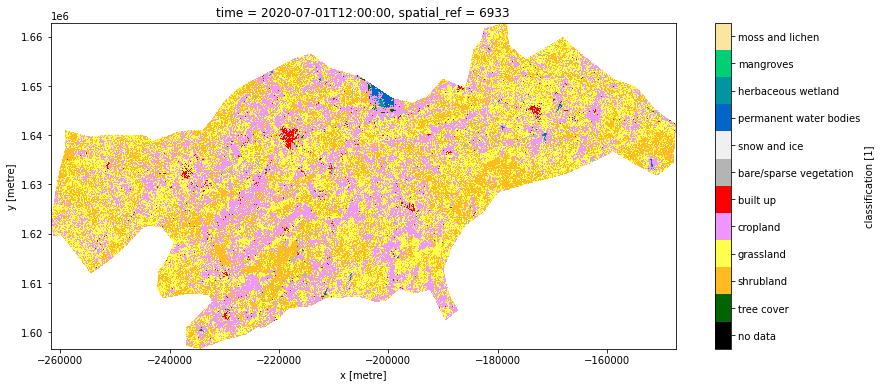

In [8]:
fig,ax = plt.subplots(figsize=(14,6))
plot_lulc(ds_esa['classification'], product='ESA', legend=True)

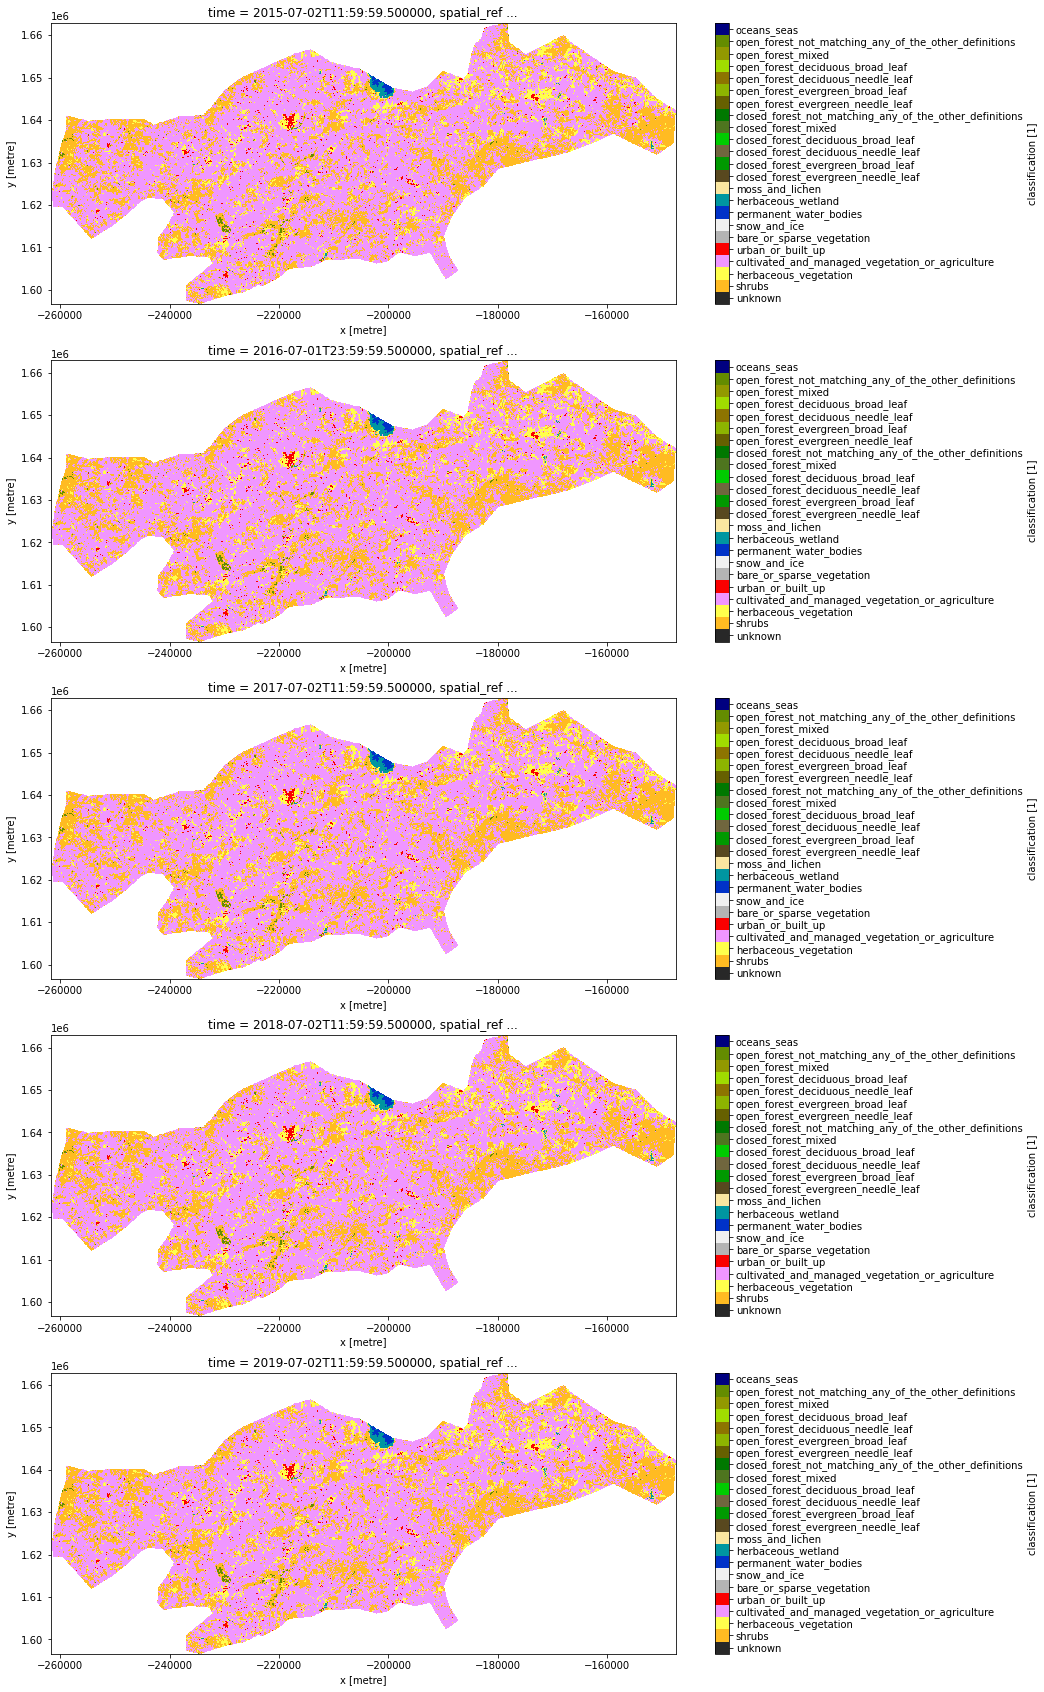

In [17]:
fig,ax = plt.subplots(5,1, figsize=(14,30))
plot_lulc(ds_cgls['classification'].isel(time=0), product='CGLS', legend=True, ax=ax[0])
plot_lulc(ds_cgls['classification'].isel(time=1), product='CGLS', legend=True, ax=ax[1])
plot_lulc(ds_cgls['classification'].isel(time=2), product='CGLS', legend=True, ax=ax[2])
plot_lulc(ds_cgls['classification'].isel(time=3), product='CGLS', legend=True, ax=ax[3])
plot_lulc(ds_cgls['classification'].isel(time=4), product='CGLS', legend=True, ax=ax[4])

In [18]:
# For the CGLS Landcover product calculate the area covered in forest for each year.
import xarray as xr
forest_mask = xr.where((ds_cgls.classification>100) & (ds_cgls.classification<200), 1, np.nan )

pixel_length = 100
m_per_km = 1000  # conversion from metres to kilometres
area_per_pixel = pixel_length**2 / m_per_km**2

# Get the pixel count for the forest land cover class. 
ds_cgls_counts_2015 = np.unique(forest_mask.isel(time=0).data, return_counts=True)
ds_cgls_counts_2016 = np.unique(forest_mask.isel(time=1).data, return_counts=True)
ds_cgls_counts_2017 = np.unique(forest_mask.isel(time=2).data, return_counts=True)
ds_cgls_counts_2018 = np.unique(forest_mask.isel(time=3).data, return_counts=True)
ds_cgls_counts_2019 = np.unique(forest_mask.isel(time=4).data, return_counts=True)

#calculate the area of each class
area_2015 =  ds_cgls_counts_2015[1][0] * area_per_pixel
area_2016 =  ds_cgls_counts_2016[1][0] * area_per_pixel
area_2017 =  ds_cgls_counts_2017[1][0] * area_per_pixel
area_2018 =  ds_cgls_counts_2018[1][0] * area_per_pixel
area_2019 =  ds_cgls_counts_2019[1][0] * area_per_pixel

print(f"Forest area in 2015: {area_2015} km2")
print(f"Forest area in 2016: {area_2016} km2")
print(f"Forest area in 2017: {area_2017} km2")
print(f"Forest area in 2018: {area_2018} km2")
print(f"Forest area in 2019: {area_2019} km2")

Forest area in 2015: 15.870000000000001 km2
Forest area in 2016: 15.860000000000001 km2
Forest area in 2017: 15.83 km2
Forest area in 2018: 15.82 km2
Forest area in 2019: 15.82 km2


In [37]:
#forest_mask.isel(time=4).plot(size=5)
from deafrica_tools.spatial import xr_vectorize

gdf = xr_vectorize(forest_mask.isel(time=4),
                   crs=ds_cgls.crs,
                   transform=ds_cgls.geobox.transform,
                   mask=forest_mask.isel(time=4).values==1,
                   export_shp='data/forest_areas/forest_areas.shp')

print(gdf.head())

   attribute                                           geometry
0        1.0  POLYGON ((-178400.000 1661700.000, -178400.000...
1        1.0  POLYGON ((-178700.000 1661500.000, -178700.000...
2        1.0  POLYGON ((-178500.000 1661400.000, -178500.000...
3        1.0  POLYGON ((-178300.000 1659800.000, -178300.000...
4        1.0  POLYGON ((-178400.000 1659700.000, -178400.000...


/env/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

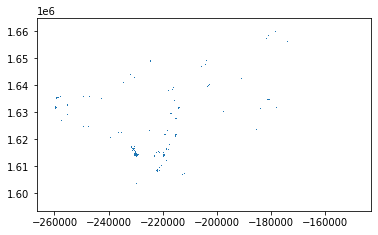

In [34]:
gdf.plot(figsize=(6, 6))

**Land cover classification products observations**
- There seems to be large areas classified as trees (forests) in the ESRI land cover product which are not corroborated by the ESA and CGLS land cover products.
- The ESA worldcover product shows no forest/trees in the area.
- The CGLS product shows a small area of forest in the Passore Commune.
- Overlaying the forest areas in QGIS with open street map did not yield a new forest.